In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
data= pd.read_csv('database_IND.csv')

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [67]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [68]:
data.shape

(908, 25)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [70]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Let's drop the columns which are irrelevant and have many null vales

In [71]:
data.drop(['country', 'country_long','owner','other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source','year_of_capacity_data'], inplace= True, axis= 1)

In [72]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [73]:
data=data.fillna(data.mean())

In [74]:
data.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [75]:
data.dtypes

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [76]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [77]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [78]:
#Transform non-numerical into numerical columns
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
  if data[column].dtype == np.number:
    continue
  data[column] = LabelEncoder().fit_transform(data[column])

In [79]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,6,2011.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,520,98.0,24.7663,74.6090,1,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,854,39.2,21.9038,69.3732,7,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,2,2004.000000,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,1,2015.000000,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [80]:
data.shape

(908, 12)

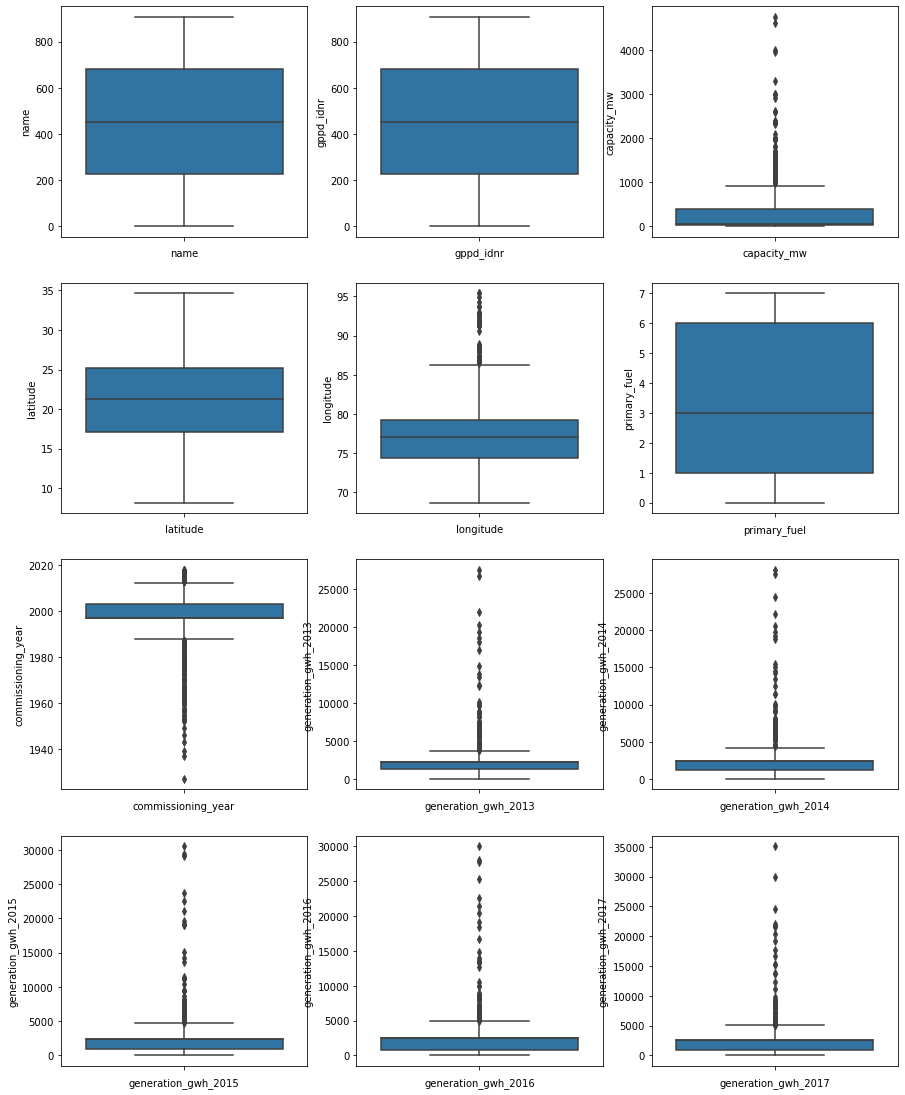

In [81]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [82]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

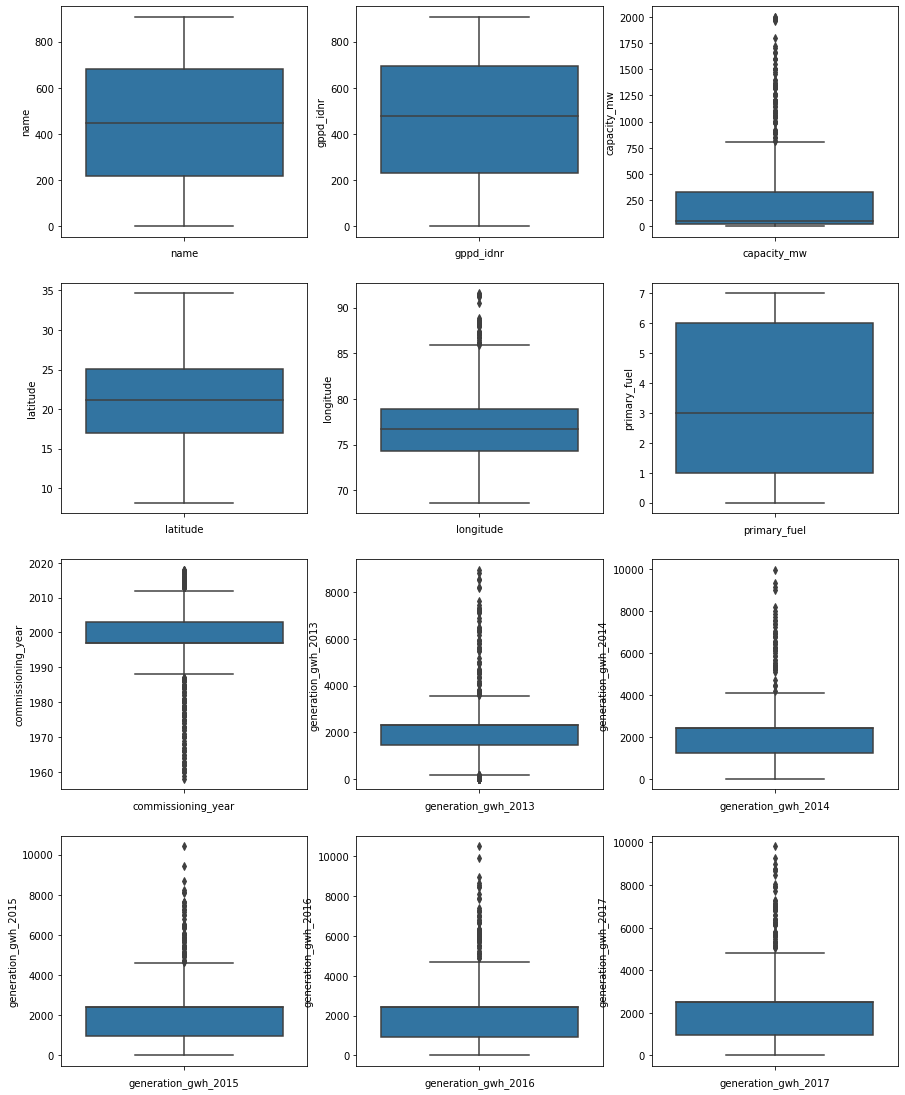

In [83]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [84]:
data.shape

(850, 12)

In [85]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [86]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

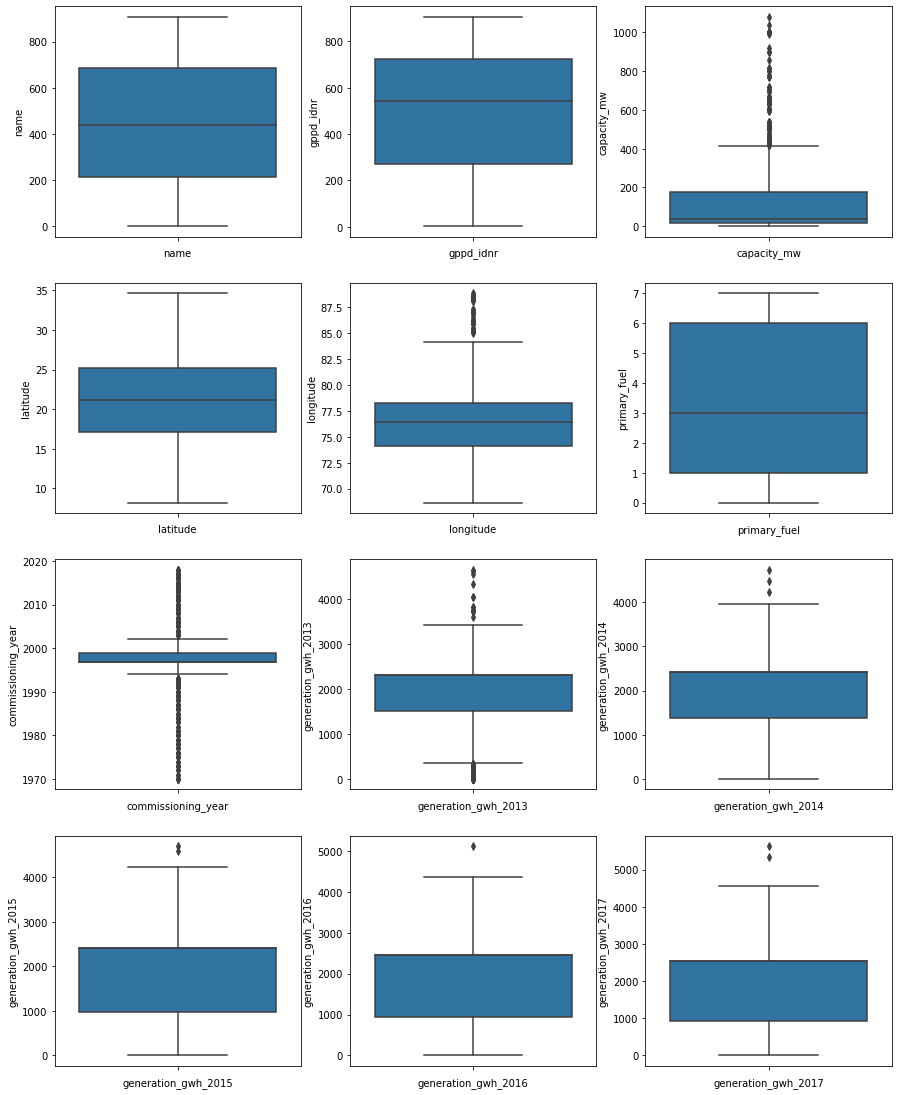

In [87]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [88]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [89]:
data.shape

(703, 12)

In [90]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [91]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [92]:
data.shape

(666, 12)

In [93]:
dataloss=((908-666)/908)*100
dataloss

26.651982378854626

Let's check the skewness of data

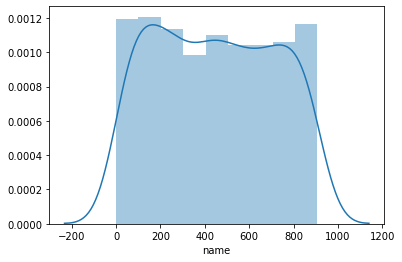

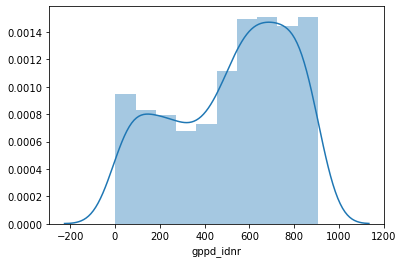

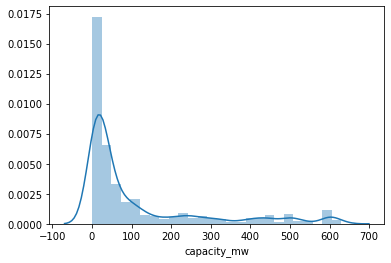

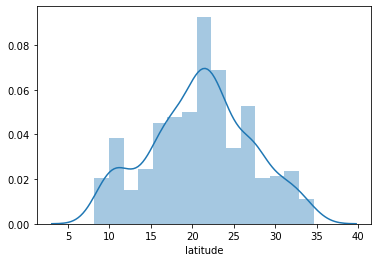

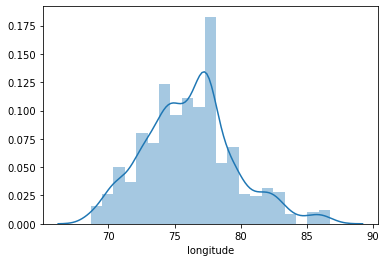

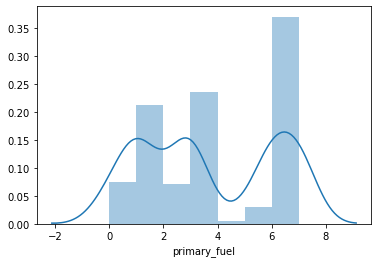

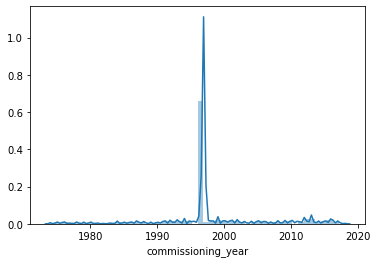

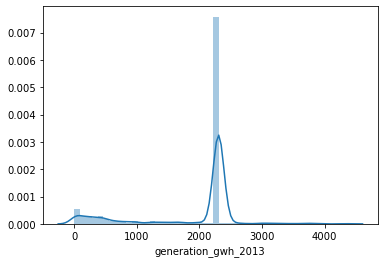

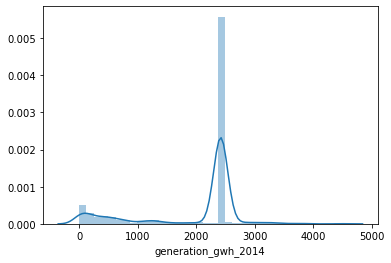

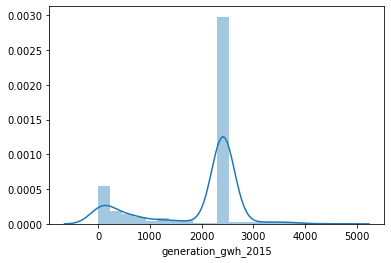

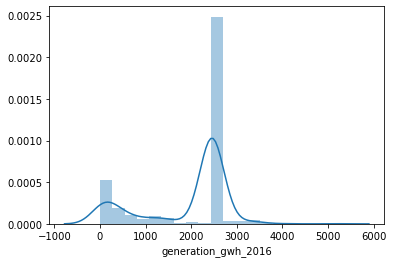

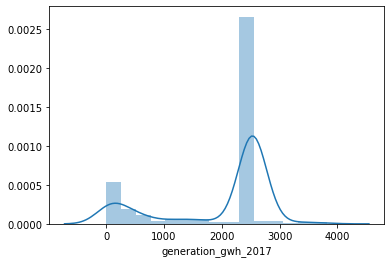

In [94]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

Many of the feature which are having left & Right skewness can be treated.

In [95]:
data.skew()

name                   0.057672
gppd_idnr             -0.412416
capacity_mw            1.798897
latitude              -0.028870
longitude              0.366494
primary_fuel           0.111882
commissioning_year     0.083306
generation_gwh_2013   -1.197304
generation_gwh_2014   -1.189803
generation_gwh_2015   -1.029825
generation_gwh_2016   -0.977557
generation_gwh_2017   -1.120928
dtype: float64

If we consider +/-0.5 as the range of skewness,then capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,
generation_gwh_2016,generation_gwh_2017 are having skewness more than the range


In [96]:
#making the skewness less than or equal to 0.5 for better prediction and to get normal distribution graph
skew=('capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017')
for col in skew:
    if data.skew().loc[col]>0.5:
        data[col]=np.log1p(data[col])

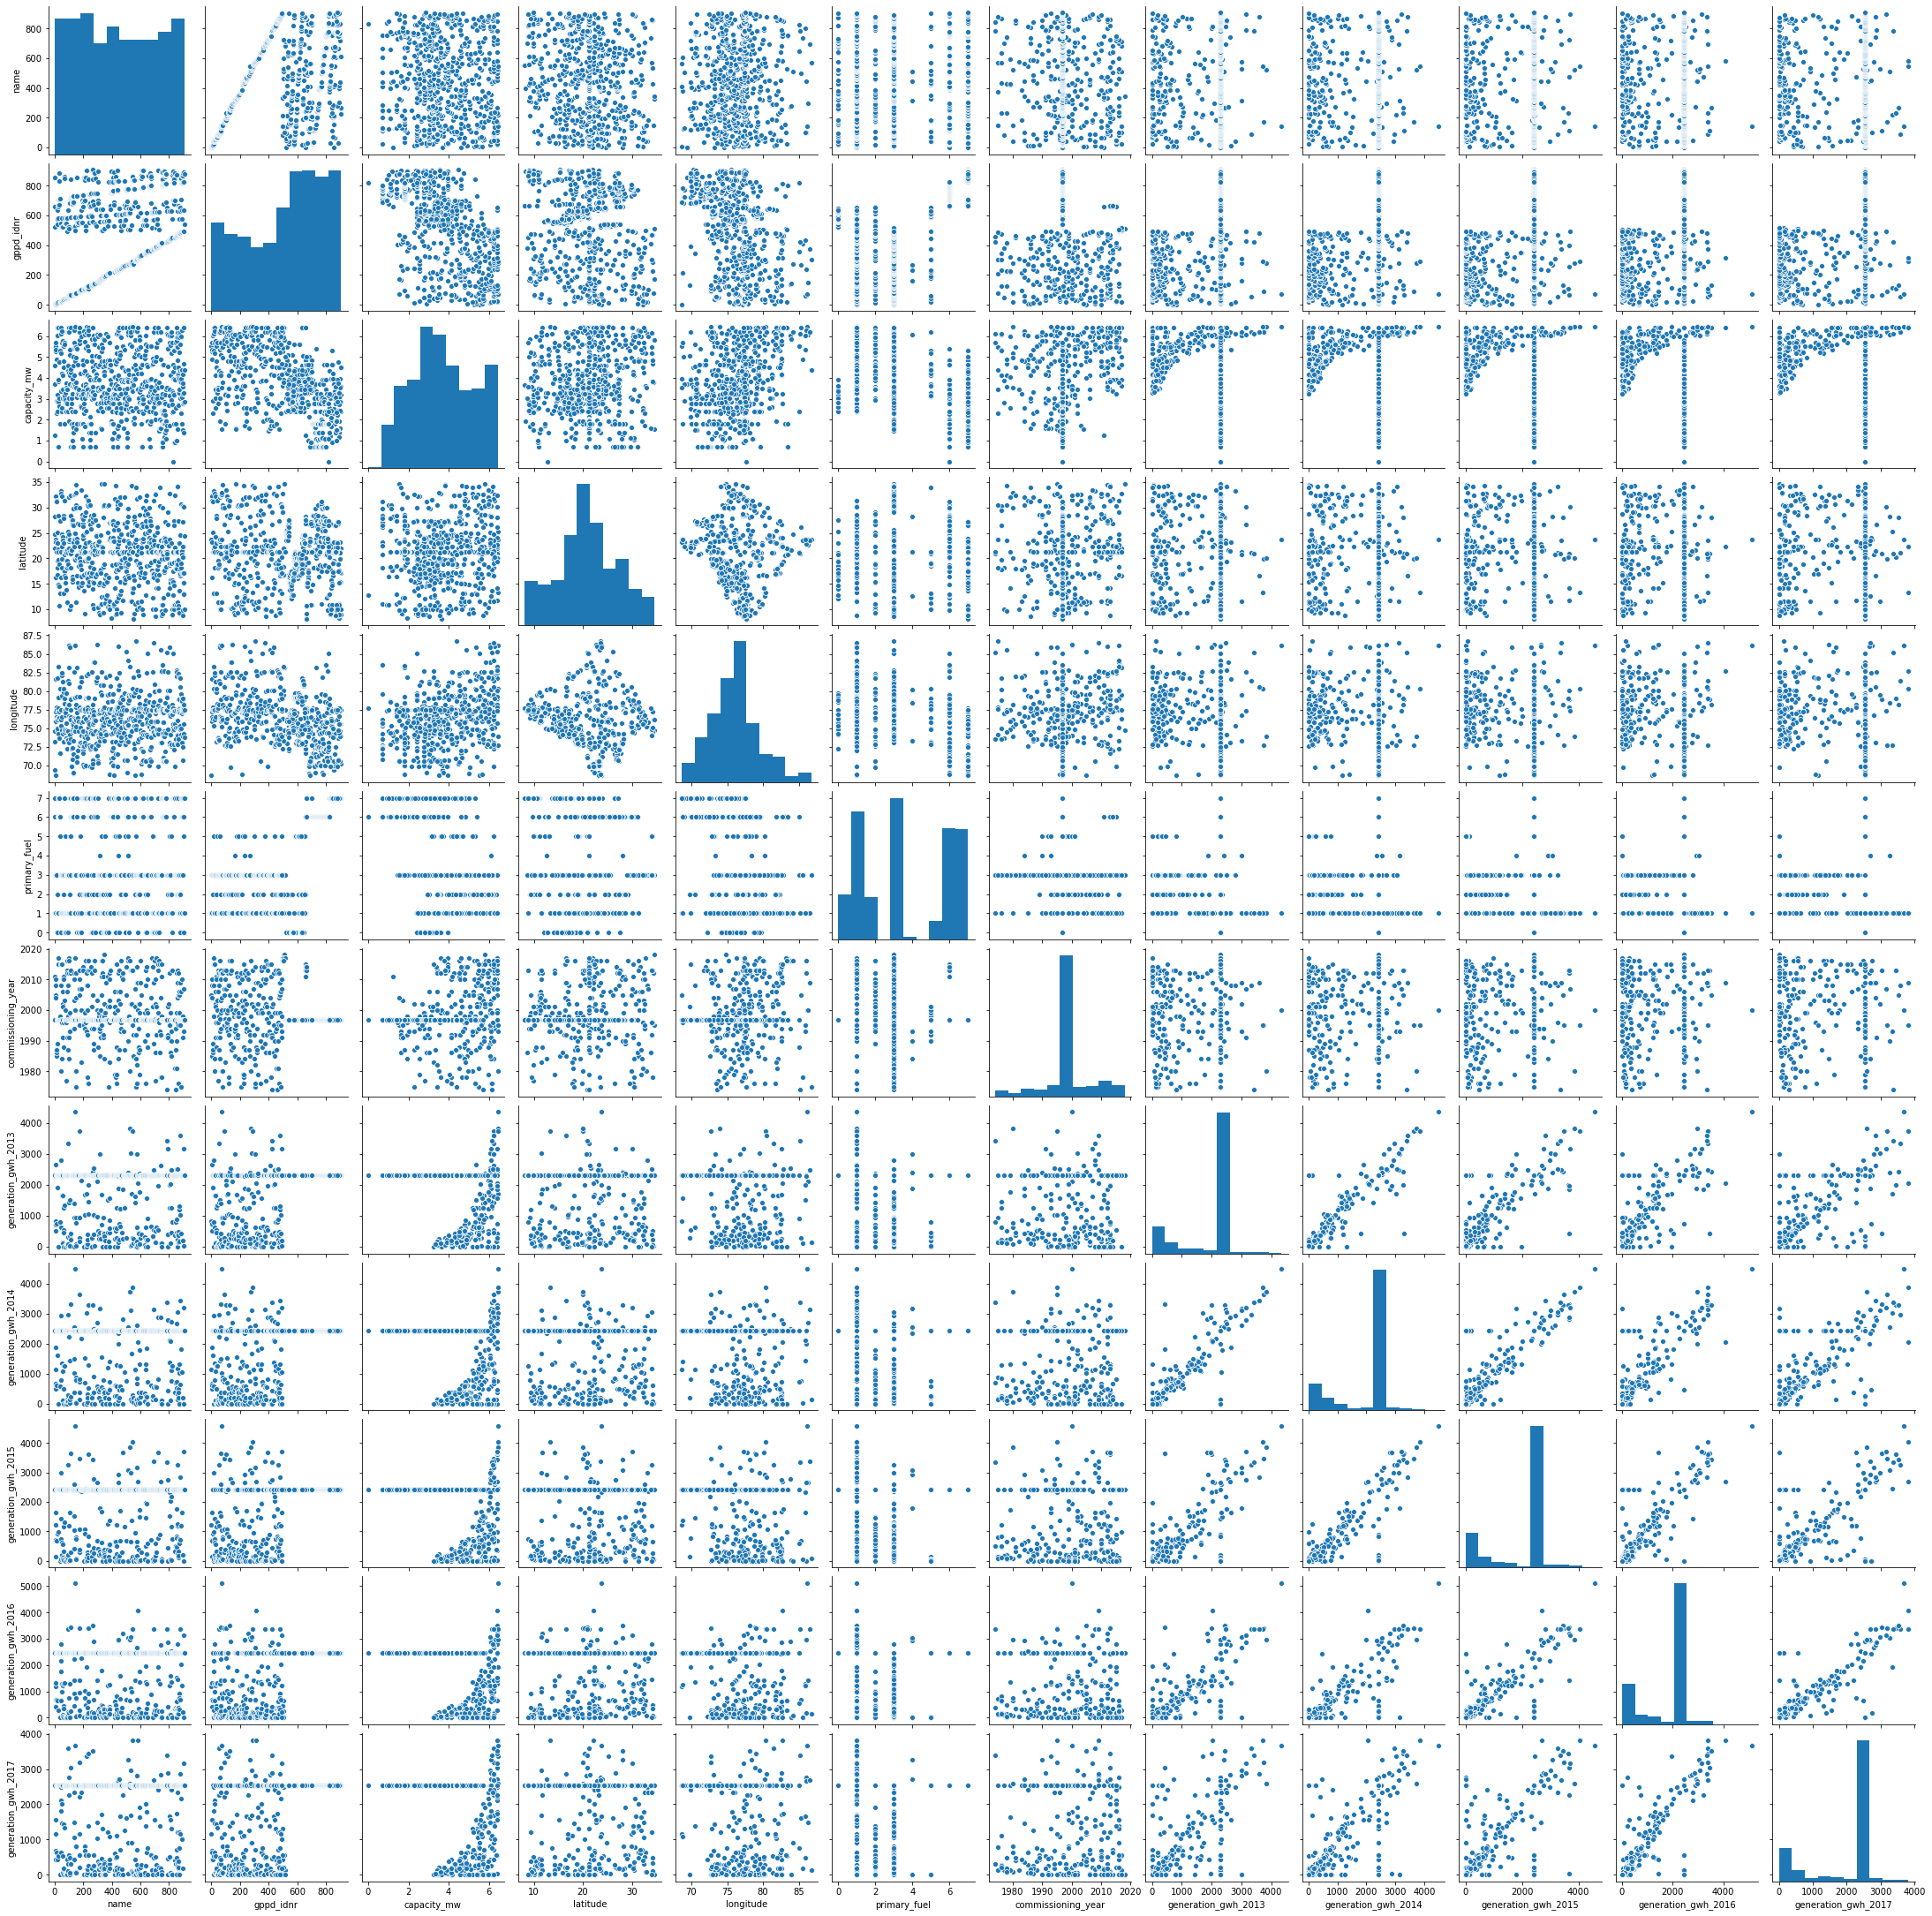

In [99]:
sns.pairplot(data)

capacity_mw: we can see capacity is mostly dependent on Coal.
latitude & longitude : They are not playing very good role in capacity_mw.
primary_fuel: Mostly Coal is used as primary fuel.
commissioning_year: we can see capacity incerases after 2000.
generation_gwh_2013-2017: we can see generation growth is almost same for each year

In [100]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.

In [101]:
data.drop(['name','gppd_idnr','commissioning_year'], axis=1, inplace= True)

In [102]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.063677,0.321159,-0.446739,-0.376120,-0.367127,-0.406989,-0.448846,-0.453290
latitude,0.063677,1.000000,-0.157581,0.014841,-0.004787,0.008783,0.005066,0.013142,-0.016159
longitude,0.321159,-0.157581,1.000000,-0.378856,-0.201134,-0.224174,-0.246473,-0.253366,-0.242662
primary_fuel,-0.446739,0.014841,-0.378856,1.000000,0.201686,0.205860,0.223076,0.245831,0.255299
generation_gwh_2013,-0.376120,-0.004787,-0.201134,0.201686,1.000000,0.961649,0.897770,0.860325,0.821708
generation_gwh_2014,-0.367127,0.008783,-0.224174,0.205860,0.961649,1.000000,0.938755,0.892921,0.845293
generation_gwh_2015,-0.406989,0.005066,-0.246473,0.223076,0.897770,0.938755,1.000000,0.931890,0.856151
generation_gwh_2016,-0.448846,0.013142,-0.253366,0.245831,0.860325,0.892921,0.931890,1.000000,0.921453
generation_gwh_2017,-0.453290,-0.016159,-0.242662,0.255299,0.821708,0.845293,0.856151,0.921453,1.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

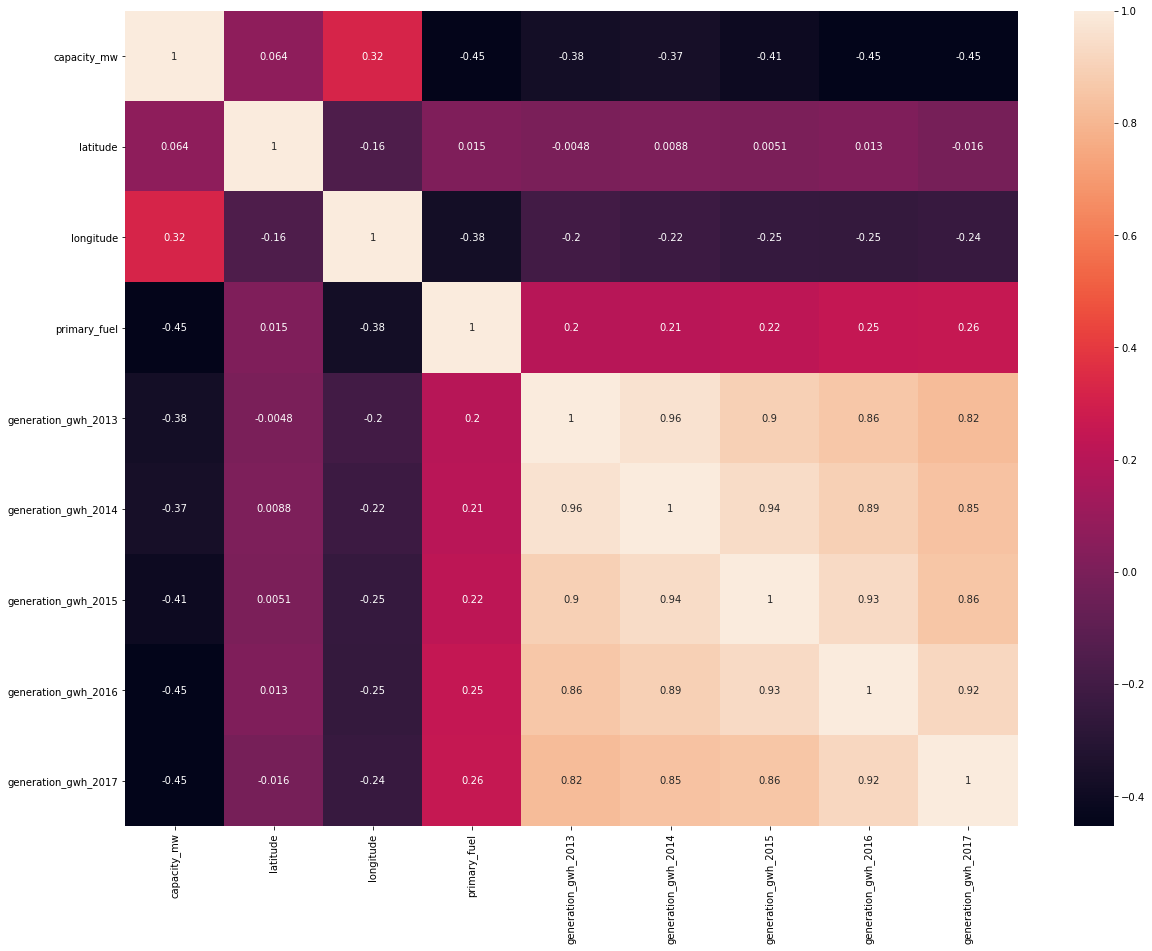

In [103]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.plot

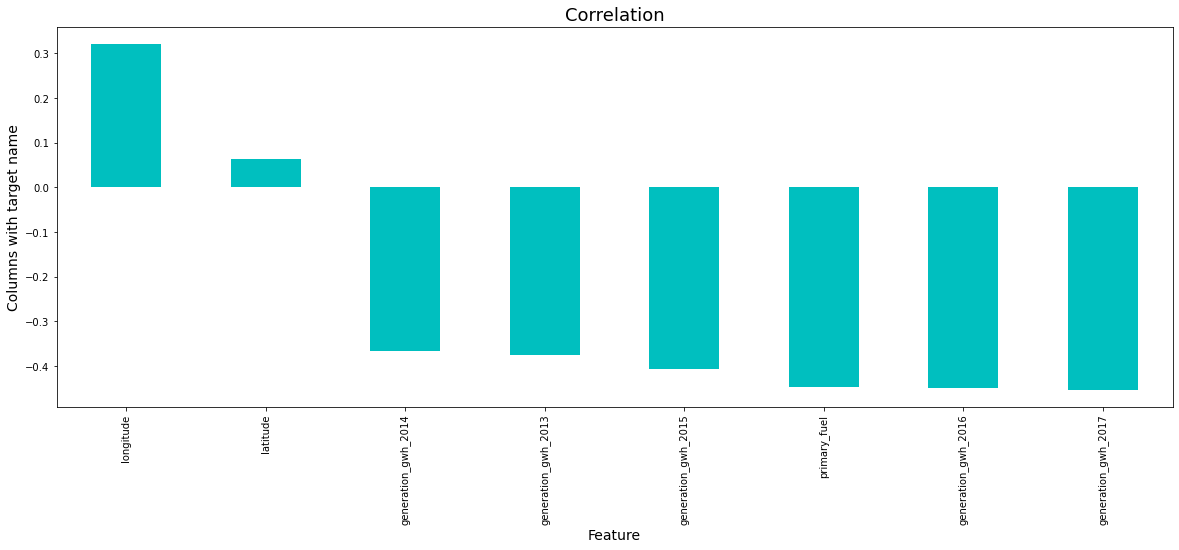

In [104]:
plt.figure(figsize=(20,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

predicting capacity_mw

In [113]:
from sklearn.preprocessing import power_transform 
# Divide the data into features and vectors.
x=data.drop(['capacity_mw'], axis=1)
y=data.iloc[:,0]

x=power_transform(x, method='yeo-johnson')
X=pd.DataFrame(data=x)

In [114]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

1.Linear Regression

In [116]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(X,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 88 The model perform very well
At random State: 88
Training r2_score 33.907312856179516
Testing r2 score  33.923538604769554
At Random state 388 The model perform very well
At random State: 388
Training r2_score 34.6234572651196
Testing r2 score  34.552968320122034
At Random state 416 The model perform very well
At random State: 416
Training r2_score 34.34329492028249
Testing r2 score  34.28285028369593
At Random state 476 The model perform very well
At random State: 476
Training r2_score 34.15056706512689
Testing r2 score  34.22813505441549
At Random state 627 The model perform very well
At random State: 627
Training r2_score 34.37844205522501
Testing r2 score  34.41047691632298
At Random state 862 The model perform very well
At random State: 862
Training r2_score 34.57033073633923
Testing r2 score  34.64660635587492


In [117]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(X,y, test_size=0.30, random_state= 862)

In [118]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.3464660635587492


In [119]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 33.0536140654973 and Accuracy score is 34.64660635587492
At cross fold 3 the Cross Val score is 31.986001224539763 and Accuracy score is 34.64660635587492
At cross fold 4 the Cross Val score is 32.92551966690381 and Accuracy score is 34.64660635587492
At cross fold 5 the Cross Val score is 32.23815025407003 and Accuracy score is 34.64660635587492
At cross fold 6 the Cross Val score is 31.18978233867682 and Accuracy score is 34.64660635587492
At cross fold 7 the Cross Val score is 29.496050710387443 and Accuracy score is 34.64660635587492
At cross fold 8 the Cross Val score is 31.804720044737035 and Accuracy score is 34.64660635587492
At cross fold 9 the Cross Val score is 30.679272523050916 and Accuracy score is 34.64660635587492


At cross fold 2 the Cross Val score is 33.05361406549731 and Accuracy score is 34.64660635587492

In [120]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 1.0286428642407859
Mean Squared Error: 1.6016522282982952
Root Mean Square Error: 1.2655639961291152


2.Lasso

In [141]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,X,y,cv=2,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.5296641081163234
Cross val Score : -0.1429811358440558


In [142]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 1.2890560178260884
Mean Squared Error: 2.4637367939242116
Root Mean Square Error: 1.5696295084905265


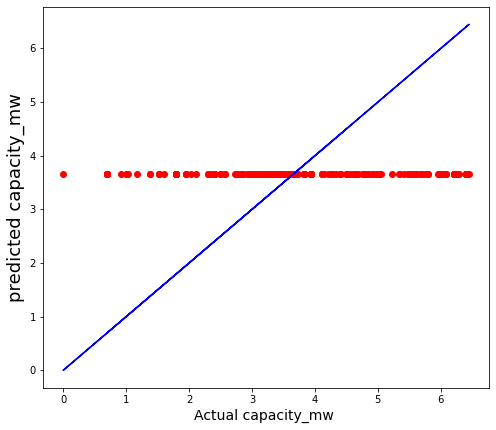

In [143]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

3.Ridge

In [144]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,X,y,cv=2, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  34.78414363254272
Cross val Score 33.16667589173997


In [145]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.0286419855207152
Mean Squared Error: 1.5982815252121083
Root Mean Square Error: 1.264231594768976


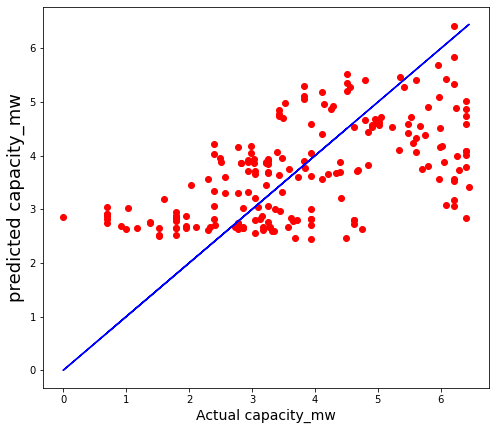

In [146]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

4. Decision TreeRegressor

In [147]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,X,y,cv=2, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 48.960839026909234
Cross Val Score: 48.29191476233974


In [148]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 0.8402993531074333
Mean Squared Error: 1.250845309551493
Root Mean Square Error: 1.1184119587841919


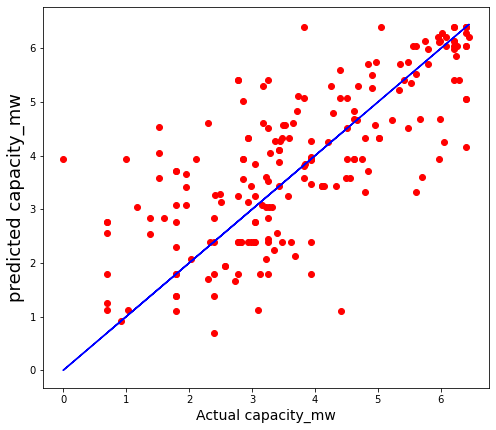

In [149]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

5. KNeighborsRegressor

In [150]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,X,y, cv=2, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 51.154789548943654
Cross val Score : 54.61678565444442


In [151]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.7861840601202138
Mean Squared Error: 1.197076935080728
Root Mean Square Error: 1.0941101110403504


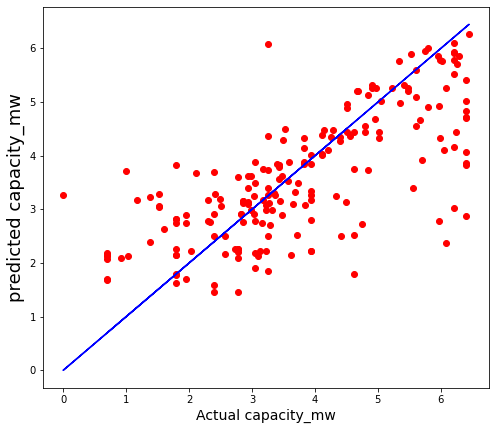

In [152]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

6. Random Forest

In [153]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,X,y, cv=2, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 68.90284995154654
Cross val Score : 67.29096665627702


In [154]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.6424545551523579
Mean Squared Error: 0.7621152765233529
Root Mean Square Error: 0.8729921400123559


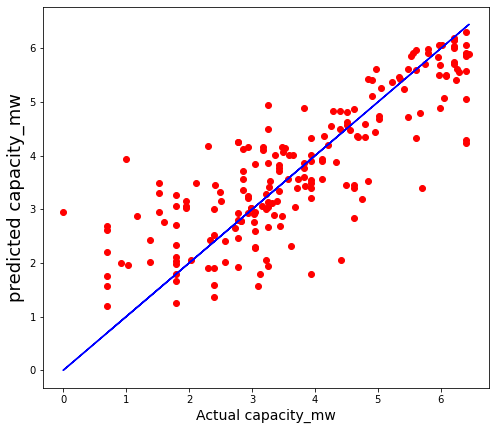

In [155]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

7. GradientBoostingRegressor

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,X,y, cv=2, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 68.90284995154654
Cross val Score : 68.53906172333606


In [157]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.6424545551523579
Mean Squared Error: 0.7621152765233529
Root Mean Square Error: 0.8729921400123559


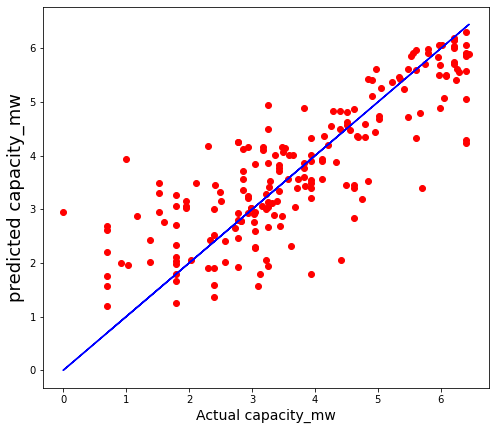

In [158]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

R2 score: 68.90284995154654
Cross val Score : 68.53906172333606
Diffrence in the scores are very less as compare to other models, we can consider this as the best model.

HyperParameter Tuning

In [159]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}


In [160]:
gb=GradientBoostingRegressor(criterion='mse', max_features='sqrt', min_samples_split=3, n_estimators=100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,X,y, cv=2, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 69.6272383355551
Cross val Score : 67.29096665627702


We can see GradientBoostingRegressor having very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

In [161]:
import pickle
filename='Global_Power_Plant.pkl'
pickle.dump(gb,open(filename,'wb'))

In [162]:
# Loading model to compare the results
loaded = pickle.load(open('Global_Power_Plant.pkl','rb'))

In [163]:
gb_pred=gb.predict(x_test_b)
gb_pred

array([2.03874851, 6.13312914, 5.78457672, 2.5397101 , 2.40783168,
       3.42844526, 3.52177101, 5.2150377 , 2.52688569, 3.98973692,
       2.85100357, 6.19324751, 3.49595075, 5.48812292, 6.17708469,
       3.7754708 , 6.16210961, 3.11006143, 3.87749075, 4.36730943,
       4.28382684, 2.38691016, 3.77769046, 3.42558081, 3.44729348,
       2.0607128 , 2.03874851, 2.0607128 , 4.64626158, 2.38691016,
       2.63580582, 2.61646475, 3.43722731, 5.25998378, 3.15297306,
       3.09473341, 3.06830763, 3.47403821, 6.11398168, 1.90702125,
       2.5397101 , 2.11525674, 5.58541929, 3.72274533, 5.48846657,
       3.87120403, 3.74082659, 4.67311284, 6.13101664, 2.94000721,
       3.19121728, 2.40898769, 6.57282043, 2.11525674, 4.6776382 ,
       1.97643358, 1.61471398, 4.74643203, 5.57865532, 2.97321393,
       4.78314179, 3.23620983, 3.90898863, 3.77769046, 6.37690963,
       3.5303114 , 2.10287819, 2.67984561, 3.32678072, 4.19427217,
       2.37856681, 3.72367288, 4.44494266, 5.27506869, 3.25343

Predicting Primary fuel

In [169]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,73.2407,6,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,4.595120,24.7663,74.6090,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,3.693867,21.9038,69.3732,7,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
5,5.525453,23.7689,68.6447,1,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
7,5.262690,32.2258,77.2070,3,696.738800,674.391100,721.335200,675.724400,679.594950


In [170]:
# deviding into fetures and target. 
x=data.drop('primary_fuel', axis=1)
y=data['primary_fuel']

In [171]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')
X2=pd.DataFrame(data=x)

In [172]:
SDc=StandardScaler()
X2=SDc.fit_transform(X2)

In [173]:
X2

array([[-1.66245336,  1.17253626, -0.84375744, ...,  0.52877069,
         0.56419974,  0.56606072],
       [ 0.61644873,  0.61790344, -0.40754535, ...,  0.52877069,
         0.56419974,  0.56606072],
       [ 0.04536717,  0.15089792, -2.20428824, ...,  0.52877069,
         0.56419974,  0.56606072],
       ...,
       [-0.22733539, -0.94089864, -0.11053853, ...,  0.52877069,
         0.56419974,  0.56606072],
       [ 0.4913078 ,  0.55013227, -0.67957529, ...,  0.52877069,
         0.56419974,  0.56606072],
       [-0.50521368, -1.83489802,  0.43989628, ...,  0.52877069,
         0.56419974,  0.56606072]])

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

Logistic Regression

In [177]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(X2,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  405 The Model performing Well
At Random State 405
Training Accuracy score is- 53.00751879699248
Testing Accuracy Score is- 52.98507462686567
At Random state  654 The Model performing Well
At Random State 654
Training Accuracy score is- 53.00751879699248
Testing Accuracy Score is- 52.98507462686567
At Random state  657 The Model performing Well
At Random State 657
Training Accuracy score is- 53.00751879699248
Testing Accuracy Score is- 52.98507462686567
At Random state  734 The Model performing Well
At Random State 734
Training Accuracy score is- 51.50375939849624
Testing Accuracy Score is- 51.49253731343284
At Random state  820 The Model performing Well
At Random State 820
Training Accuracy score is- 53.00751879699248
Testing Accuracy Score is- 52.98507462686567
At Random state  835 The Model performing Well
At Random State 835
Training Accuracy score is- 53.00751879699248
Testing Accuracy Score is- 52.98507462686567
At Random state  872 The Model performing Well
At Ra

In [178]:
x=X2

In [179]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=405,test_size=0.20)

In [180]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.5298507462686567


In [181]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  2  0  1  0  0  1  6]
 [ 0 19  2  1  0  0  4  4]
 [ 0  1  1  2  0  0  0  2]
 [ 0  5  0 18  0  0  4  6]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  3]
 [ 0  3  0  1  0  0 20  5]
 [ 0  4  0  0  0  0  4 13]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.56      0.63      0.59        30
           2       0.25      0.17      0.20         6
           3       0.75      0.55      0.63        33
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.61      0.69      0.65        29
           7       0.33      0.62      0.43        21

    accuracy                           0.53       134
   macro avg       0.31      0.33      0.31       134
weighted avg       0.50      0.53      0.50       134



Cross validation of model

In [182]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 51.051051051051054
Accuracy Score:- 52.98507462686567


at cv:- 3
Cross Validation scre is:- 51.05105105105105
Accuracy Score:- 52.98507462686567


at cv:- 4
Cross Validation scre is:- 51.19760479041916
Accuracy Score:- 52.98507462686567


at cv:- 5
Cross Validation scre is:- 51.045898327909335
Accuracy Score:- 52.98507462686567


at cv:- 6
Cross Validation scre is:- 51.80180180180181
Accuracy Score:- 52.98507462686567


at cv:- 7
Cross Validation scre is:- 50.89912280701754
Accuracy Score:- 52.98507462686567


at cv:- 8
Cross Validation scre is:- 51.34107860011474
Accuracy Score:- 52.98507462686567


at cv:- 9
Cross Validation scre is:- 51.35135135135135
Accuracy Score:- 52.98507462686567




At cv-6 Cross val score and Accuracy Score are having very less diffrence

SVC

In [183]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=6, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 51.49253731343284
Cross val Score : 52.55255255255255


In [184]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  1  0  0  0  0  2  7]
 [ 0 16  0  3  0  0  5  6]
 [ 0  3  0  1  0  0  0  2]
 [ 0  4  0 19  0  0  4  6]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  3]
 [ 0  2  0  0  0  0 22  5]
 [ 0  4  0  0  0  0  5 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.52      0.53      0.52        30
           2       0.00      0.00      0.00         6
           3       0.79      0.58      0.67        33
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.58      0.76      0.66        29
           7       0.29      0.57      0.39        21

    accuracy                           0.51       134
   macro avg       0.27      0.30      0.28       134
weighted avg       0.48      0.51      0.48       134



KNeighborsClassifier

In [185]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=6, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 60.447761194029844
Cross val Score : 60.51051051051051


In [186]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 6  2  0  0  0  0  1  1]
 [ 2 17  1  3  0  0  2  5]
 [ 0  1  3  1  0  1  0  0]
 [ 0  2  1 22  0  0  1  7]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 1  2  0  2  0  0 20  4]
 [ 1  2  0  2  0  0  3 13]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.65      0.57      0.61        30
           2       0.33      0.50      0.40         6
           3       0.71      0.67      0.69        33
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.74      0.69      0.71        29
           7       0.43      0.62      0.51        21

    accuracy                           0.60       134
   macro avg       0.43      0.46      0.44       134
weighted avg       0.61      0.60      0.60       134



DecisionTreeClassifier

In [193]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=6, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 65.67164179104478
Cross val score is: 60.96096096096096


In [194]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[ 5  2  1  1  0  0  1  0]
 [ 0 18  2  4  1  1  2  2]
 [ 0  2  1  1  0  1  0  1]
 [ 0  2  0 24  0  0  0  7]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 1  2  0  0  0  0 22  4]
 [ 1  1  0  2  0  0  2 15]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.67      0.60      0.63        30
           2       0.17      0.17      0.17         6
           3       0.75      0.73      0.74        33
           4       0.00      0.00      0.00         1
           5       0.60      0.75      0.67         4
           6       0.81      0.76      0.79        29
           7       0.52      0.71      0.60        21

    accuracy                           0.66       134
   macro avg       0.53      0.53      0.52       134
weighted avg       0.67      0.66      0.66       134



RandomForestClassifier

In [206]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=6, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  70.8955223880597
Cross val Score : 69.81981981981983


In [207]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[ 8  0  0  1  0  0  1  0]
 [ 0 20  2  1  0  1  2  4]
 [ 0  1  1  2  0  2  0  0]
 [ 0  1  0 25  0  0  0  7]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 2  0  0  0  0  0 22  5]
 [ 1  1  0  1  0  0  2 16]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.87      0.67      0.75        30
           2       0.20      0.17      0.18         6
           3       0.83      0.76      0.79        33
           4       0.00      0.00      0.00         1
           5       0.50      0.75      0.60         4
           6       0.81      0.76      0.79        29
           7       0.50      0.76      0.60        21

    accuracy                           0.71       134
   macro avg       0.56      0.58      0.56       134
weighted avg       0.73      0.71      0.71       134



AdaBoostClassifier

In [197]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=6, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  38.059701492537314
Cross val Score : 37.38738738738739


In [198]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 4  1  0  0  0  0  2  3]
 [ 0 15  2  1  1  1  5  5]
 [ 0  1  2  1  0  1  0  1]
 [ 0  3  8  4  0  5  7  6]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  3]
 [ 1  3  0  0  0  0 22  3]
 [ 3  4  0  0  0  0 10  4]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.56      0.50      0.53        30
           2       0.15      0.33      0.21         6
           3       0.57      0.12      0.20        33
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.48      0.76      0.59        29
           7       0.16      0.19      0.17        21

    accuracy                           0.38       134
   macro avg       0.30      0.29      0.27       134
weighted avg       0.44      0.38      0.36       134



GaussianNB

In [199]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=6, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 46.26865671641791
Cross Val Score is : 46.69669669669669


KNeighborsClassifier is best model as it has less difference between accuracy and cross validation scores.

Hyperparameter Tuning of the model

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters={'n_neighbors' : [3,5,11,19], 'weights':['uniform', 'distance'], 'metric':['euclidean','manhattan'] }
kn=KNeighborsClassifier()
knclf=GridSearchCV(kn, param_grid=parameters,verbose=1,cv=6, n_jobs=-1)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)


Fitting 6 folds for each of 16 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    4.9s finished


In [217]:
kn=KNeighborsClassifier(metric='manhattan',n_neighbors=3, weights='distance')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score: ', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8,scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score:  64.92537313432835
Cross val Score : 67.42147160068848


KNeighborsClassifier with accuracy_score: 64.92537313432835 Cross val Score : 67.41741741741741 is our best model.

In [218]:
import pickle
filename="Global_Power_Plant_Database_fuel.pkl "
pickle.dump(dt, open(filename,'wb'))

In [219]:
# Loading model to compare the results
loaded = pickle.load(open('Global_Power_Plant_Database_fuel.pkl','rb'))

In [220]:
kn_pred=kn.predict(x_test_b)
kn_pred

array([1, 7, 7, 7, 1, 7, 1, 6, 7, 6, 7, 6, 7, 3, 7, 5, 7, 2, 1, 1, 3, 6,
       3, 7, 5, 3, 6, 0, 5, 6, 6, 3, 7, 0, 1, 1, 6, 3, 1, 0, 6, 3, 7, 1,
       3, 1, 3, 0, 6, 1, 6, 3, 3, 6, 7, 3, 6, 3, 7, 7, 7, 7, 0, 6, 1, 5,
       6, 6, 6, 3, 7, 3, 5, 0, 3, 7, 1, 0, 1, 2, 7, 7, 2, 6, 6, 3, 6, 1,
       7, 6, 3, 6, 7, 3, 1, 2, 7, 7, 7, 5, 6, 1, 1, 7, 7, 3, 1, 7, 1, 7,
       6, 6, 7, 6, 3, 3, 3, 3, 1, 6, 7, 0, 7, 2, 1, 1, 3, 0, 7, 5, 7, 6,
       1, 1])